In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

RDKit WARNING: [16:22:37] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
with open('../bojicm/compound/chembl395.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [16:23:21] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:23:21] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [16:23:22] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:23:22] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [16:23:21] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:23:22] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:23:22] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [16:23:22] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:23:22] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:23:22] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [16:23:22] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:23:22] Can't kek

RDKit ERROR: [16:23:22] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [16:23:22] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:23:22] ERROR: Could not sanitize molecule ending on line 623202
RDKit ERROR: [16:23:22] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:23:22] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [16:23:22] ERROR: Could not sanitize molecule ending on line 628065
RDKit ERROR: [16:23:22] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [16:23:22] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [16:23:22] ERROR: Could not sanitize molecule ending on line 636938
RDKit ERROR: [16:23:22] ERROR: Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [16:23:22] Explicit valence for atom # 0 O, 3, i

In [3]:
# SMARTS-based chemical substructures are instantiated much like the standard SMILES-based mol instances:
ethanol_pattern = Chem.MolFromSmarts('CCO')
# and test our first substruct search

propanol = Chem.MolFromSmiles('CCCO') # a direct superstructure of ethanol
propanol.HasSubstructMatch(ethanol_pattern)

True

In [4]:
# now for something definitely without the CCO substructure
toluene = Chem.MolFromSmiles('Cc1ccccc1')
toluene.HasSubstructMatch(ethanol_pattern)

False

In [5]:
# any matches of the ethanol subgraphs count
# including the CCO in CC(O)OH group of carboxylic acids
citric_acid = Chem.MolFromSmiles('OC(=O)CC(O)(C(=O)O)CC(=O)O')
citric_acid.HasSubstructMatch(ethanol_pattern)

True

In [6]:
# The RDKit functionality also goes well beyond the basic binary does/doesn't match.
# Function GetSubstructMatch will get indices of all matching atoms and bonds
# within the target molecule
import itertools # for getting combinations without having to write additional function
hit_atoms = propanol.GetSubstructMatch(ethanol_pattern) # indices of matching atoms
hit_bonds = [propanol.GetBondBetweenAtoms(i, j).GetIdx()
             for i, j in itertools.combinations(hit_atoms, 2)
             if propanol.GetBondBetweenAtoms(i, j)]
hit_atoms, hit_bonds

((1, 2, 3), [1, 2])

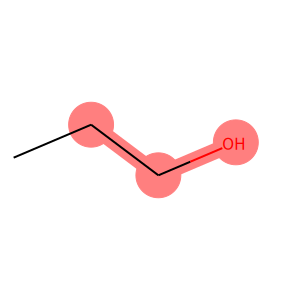

In [7]:
# so the hit matches atoms with IDs 1, 2, 3 and bonds with IDs 1 and 2
# we can even visualize the hits by coloring the hit atoms and bonds
# we will need few more fancy libraries though
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
d = rdMolDraw2D.MolDraw2DSVG(300,300)
rdMolDraw2D.PrepareAndDrawMolecule(d, propanol, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
d.FinishDrawing()
display(SVG(d.GetDrawingText()))

In [8]:
import itertools
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def visualize_match(structure, pattern):
    # GetSubstructMatches grabs all hits, GetSubstructMatch the first one it finds
    hits = structure.GetSubstructMatches(pattern)
    hit_atoms = set()
    hit_bonds = set()
    for hit in hits:
        hit_atoms.update(hit)
        hit_bonds.update([structure.GetBondBetweenAtoms(i, j).GetIdx()
                          for i, j in itertools.combinations(hit_atoms, 2)
                          if structure.GetBondBetweenAtoms(i, j)])
    d = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(d, structure, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    d.FinishDrawing()
    display(SVG(d.GetDrawingText()))

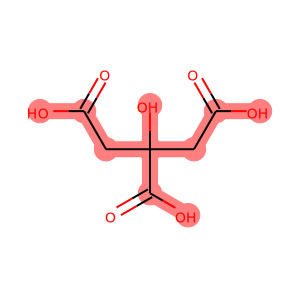

In [9]:
# let's test it out on our citric acid and ethanol patterns:
visualize_match(citric_acid, ethanol_pattern)

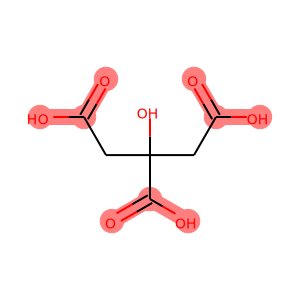

In [10]:
cooh_pattern = Chem.MolFromSmarts('C(=O)[O;h1]')
# means C (double bond to O on a sidechain) O with one implicit hydrogen
visualize_match(citric_acid, cooh_pattern)

In [11]:
cooh_counts_mtor = [len(m.GetSubstructMatches(cooh_pattern)) for m in mtor_ligands]
cooh_counts_mtor_nonzero = [m for m in cooh_counts_mtor if m]
len(cooh_counts_mtor), len(cooh_counts_mtor_nonzero), sum(cooh_counts_mtor_nonzero)/len(cooh_counts_mtor_nonzero)

(20127, 863, 1.205098493626883)

In [12]:
''' From 20127 ligands, 863 structures have the COOH group, 
and the average is 1.2 - meaning that some of them have more than one COOH group'''

' From 20127 ligands, 863 structures have the COOH group, \nand the average is 1.2 - meaning that some of them have more than one COOH group'

In [13]:
cooh_counts_drugbank = [len(m.GetSubstructMatches(cooh_pattern)) for m in drugs]
cooh_counts_drugbank_nonzero = [m for m in cooh_counts_drugbank if m]
len(cooh_counts_drugbank), len(cooh_counts_drugbank_nonzero),\
sum(cooh_counts_drugbank_nonzero)/len(cooh_counts_drugbank_nonzero),\
max(cooh_counts_drugbank_nonzero)

(7113, 1635, 1.2574923547400612, 8)

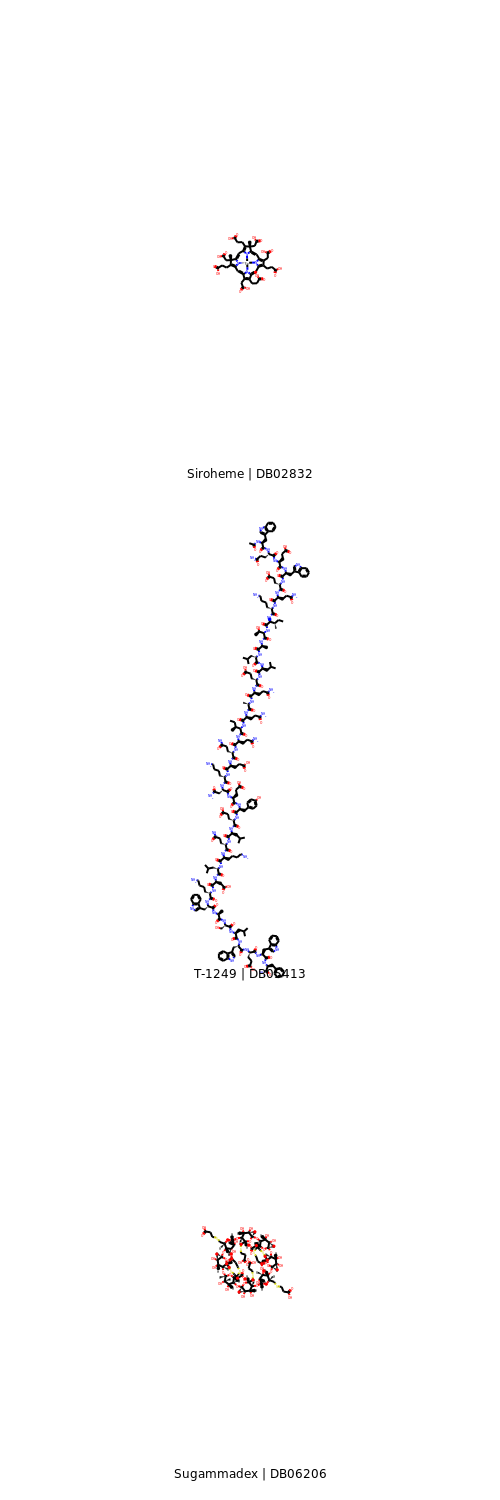

In [14]:
lots_of_cooh = [m for m, i in zip(drugs, cooh_counts_drugbank) if i == 8]
Draw.MolsToGridImage(lots_of_cooh, molsPerRow=1, subImgSize=(500,500),
                     legends=["{} | {}".format(m.GetProp('GENERIC_NAME'), m.GetProp('DRUGBANK_ID'))
                              for m in lots_of_cooh])

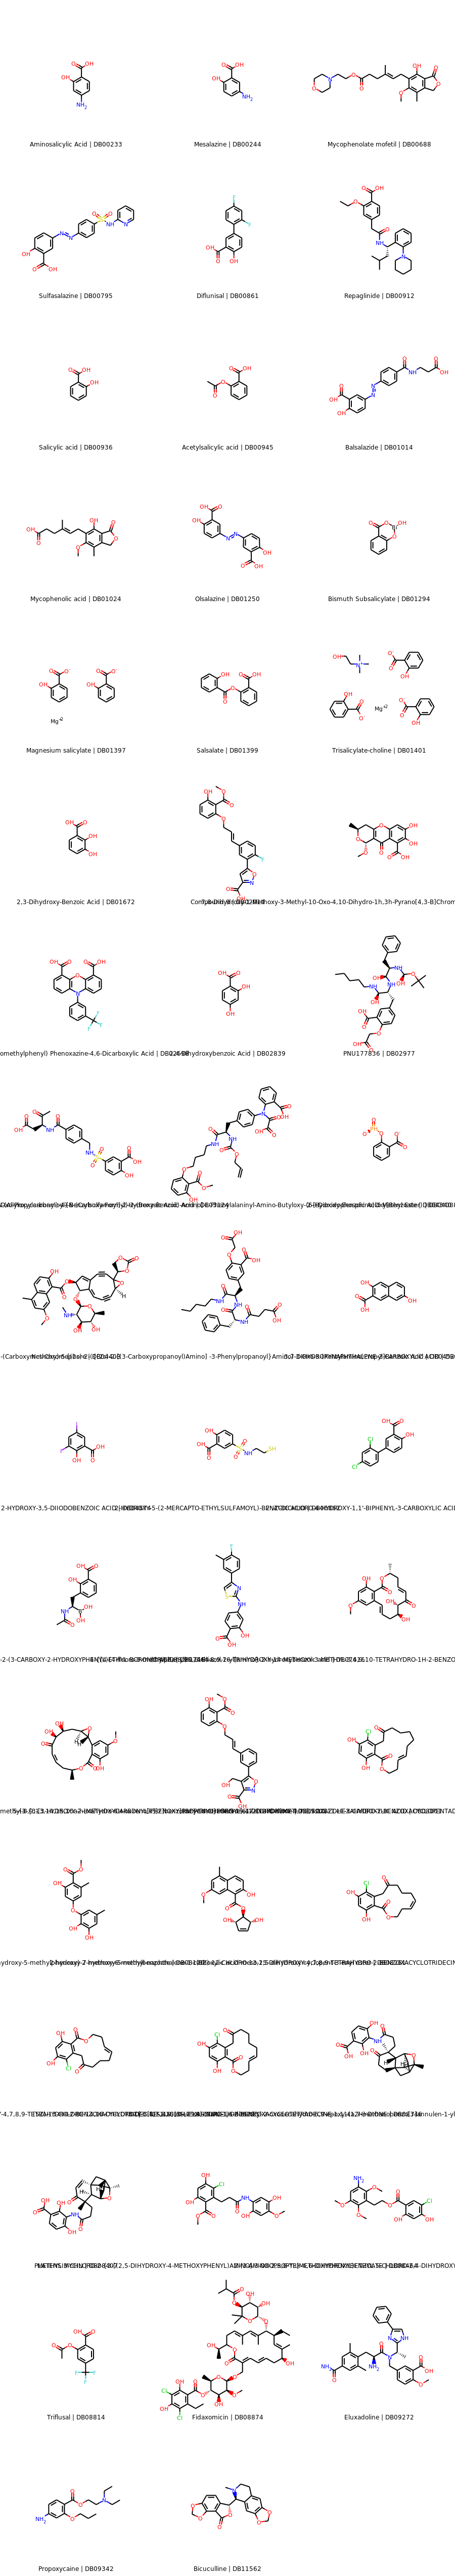

In [15]:
salicylic_acid_pattern = Chem.MolFromSmarts('c1ccc(c(c1)C(=O)O)O')
# get all salicylic acid derivates from DrugBank
drugbank_salicylics = [m for m in drugs if m.HasSubstructMatch(salicylic_acid_pattern)]
Draw.MolsToGridImage(drugbank_salicylics, molsPerRow=3, subImgSize=(300,300),
                     legends=["{} | {}".format(m.GetProp('GENERIC_NAME'), m.GetProp('DRUGBANK_ID'))
                              for m in drugbank_salicylics])

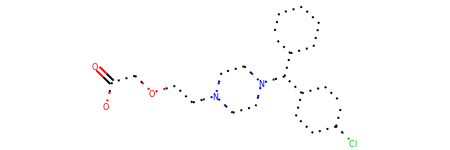

In [16]:
cetirizine_pattern = Chem.MolFromSmarts('Clc1ccc(cc1)C(c2ccccc2)N3CCN(CC3)CCOCC(=O)O')
cetirizine_pattern

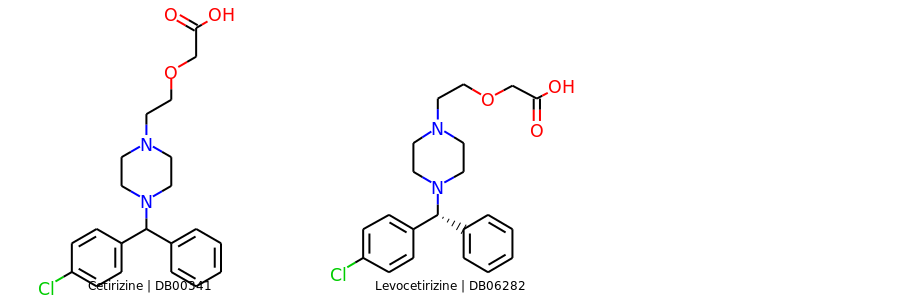

In [17]:
drugbank_cetirizine = [m for m in drugs if m.HasSubstructMatch(cetirizine_pattern)]
Draw.MolsToGridImage(drugbank_cetirizine, molsPerRow=3, subImgSize=(300,300),
                     legends=["{} | {}".format(m.GetProp('GENERIC_NAME'), m.GetProp('DRUGBANK_ID'))
                              for m in drugbank_cetirizine])

In [18]:
from itertools import chain
# load PAINS structures in SMARTS format from two files in data
pains = []
with open('../data/pains/p_l15.txt', 'r') as f, open('../data/pains/p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t') # split by tab
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")]) # remove the xml tags
pains, len(pains)

([[<rdkit.Chem.rdchem.Mol at 0x7f01a9e19670>, 'anil_di_alk_F(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e19490>, 'hzone_anil(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e198f0>, 'het_5_pyrazole_OH(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e19940>, 'het_thio_666_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e19990>, 'styrene_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e19a30>, 'ne_rhod_C(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e199e0>, 'hp_amino_CN_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e19a80>, 'cyano_imine_C(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e19ad0>, 'thio_urea_A(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e19b20>, 'thiophene_amino_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e19b70>, 'keto_keto_beta_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e19bc0>, 'keto_phenone_A(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e19c10>, 'cyano_pyridone_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e19c60>, 'thiaz_ene_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f01a9e19cb0>, '

In [19]:
for m in mtor_ligands: # for each ligand
    # add a variable that stores indices of all PAINS patterns that match it
    m.pain_hits = [i for i, pain in enumerate(pains) if m.HasSubstructMatch(pain[0])]

mtor_with_pains = [m for m in mtor_ligands if m.pain_hits]
mtor_with_pains

 ...]

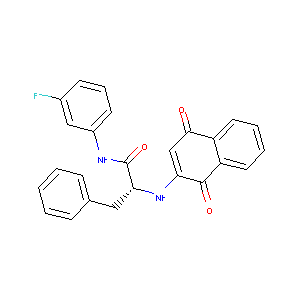

In [20]:
Draw.MolToImage(mtor_with_pains[0])

In [21]:
mtor_with_pains[0].pain_hits, pains[mtor_with_pains[0].pain_hits[0]]  

([413], [<rdkit.Chem.rdchem.Mol at 0x7f01a9e29cb0>, 'quinone_A(370)'])

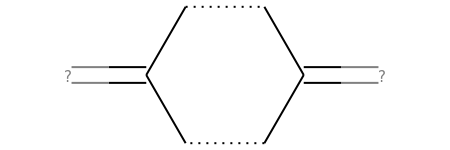

In [22]:
pains[mtor_with_pains[0].pain_hits[0]][0]

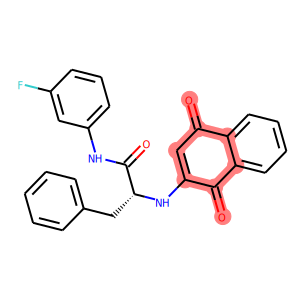

In [23]:
visualize_match(mtor_with_pains[0], pains[mtor_with_pains[0].pain_hits[0]][0])